In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [43]:
def ornstein_uhlenbeck_process(alpha, delta, theta, dt, total_time):
    """
    Given the parameters to the Ornstein-Uhlenbeck (OU) process, return an array of values with
    length `total_time` representing the outcome of the process.
    """
    X = np.zeros(total_time)
    
    for t in xrange(total_time - 1):
        selection = alpha * (theta - X[t]) * dt
        bm = delta * np.random.normal(0, dt)
        dXt = selection + bm
        X[t + 1] = X[t] + dXt
    
    return X

In [131]:
def generate_ornstein_uhlenbeck_distribution(iterations, params):
    x_axis = range(params["total_time"])
    X_distribution = ((x_axis, ornstein_uhlenbeck_process(**params))
                      for i in xrange(iterations))
    plt.plot(*[np.array(array) for line in X_distribution for array in line])
    plt.axhline(y=params["theta"], color="r")

In [175]:
def shifting_ornstein_uhlenbeck_process(alpha, delta, thetas, p_theta, dt, total_time):
    """
    Given the parameters to the Ornstein-Uhlenbeck (OU) process, return an array of values with
    length `total_time` representing the outcome of the process.
    """
    X = np.zeros(total_time)
    theta = np.random.choice(thetas)
    for t in xrange(total_time - 1):
        # Determine whether theta has changed or not.
        if np.random.random() < p_theta:
            theta = np.random.choice(thetas)
            
        selection = alpha * (theta - X[t]) * dt
        bm = delta * np.random.normal(0, dt)
        dXt = selection + bm
        X[t + 1] = X[t] + dXt
    
    return X

In [180]:
def generate_shifting_ornstein_uhlenbeck_distribution(iterations, params):
    x_axis = range(params["total_time"])
    X_distribution = ((x_axis, shifting_ornstein_uhlenbeck_process(**params))
                      for i in xrange(iterations))
    plt.plot(*[np.array(array) for line in X_distribution for array in line])
    
    for theta in params["thetas"]:
        plt.axhline(y=theta, color="r")

In [2]:
# Weak Brownian motion with no selection.
params_bm = {
    "alpha": 0,
    "delta": 1,
    "theta": 100.0,
    "dt": 1,
    "total_time": 100
}

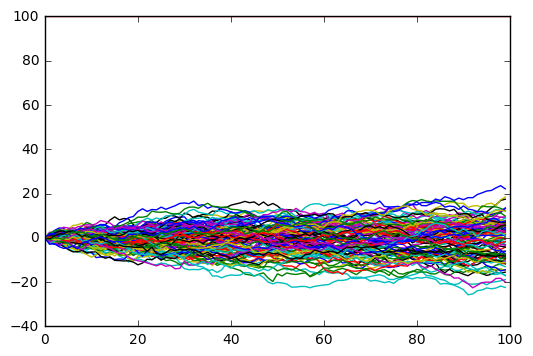

In [137]:
generate_ornstein_uhlenbeck_distribution(100, params_bm)

In [138]:
# Strong Brownian motion with no selection.
params_bm = {
    "alpha": 0,
    "delta": 4,
    "theta": 100.0,
    "dt": 1,
    "total_time": 100
}

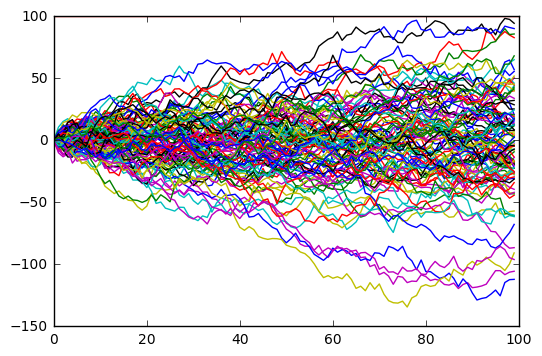

In [139]:
generate_ornstein_uhlenbeck_distribution(100, params_bm)

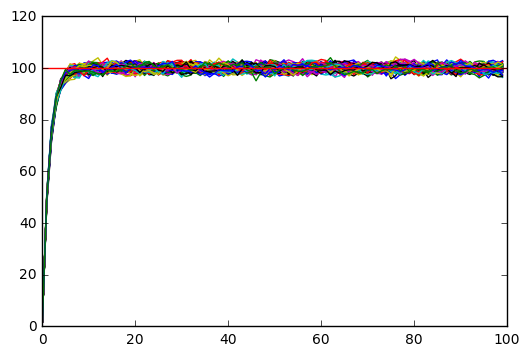

In [142]:
# Weak Brownian motion with weak selection.
params_selection = {
    "alpha": 0.5,
    "delta": 1,
    "theta": 100.0,
    "dt": 1,
    "total_time": 100
}
generate_ornstein_uhlenbeck_distribution(100, params_selection)

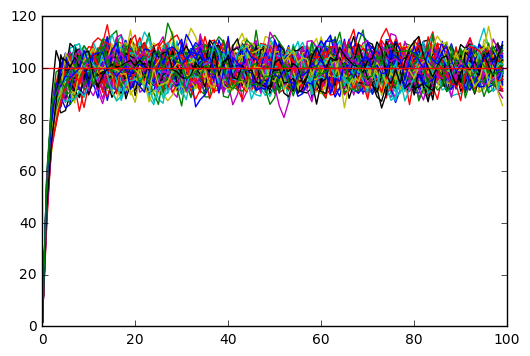

In [143]:
# Strong Brownian motion with weak selection.
params_selection = {
    "alpha": 0.5,
    "delta": 4,
    "theta": 100.0,
    "dt": 1,
    "total_time": 100
}
generate_ornstein_uhlenbeck_distribution(100, params_selection)

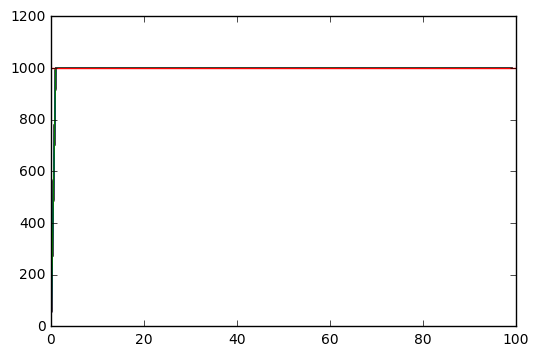

In [170]:
# Weak Brownian motion with strong selection.
params_selection = {
    "alpha": 1,
    "delta": 0.1,
    "theta": 1000.0,
    "dt": 1,
    "total_time": 100
}
generate_ornstein_uhlenbeck_distribution(100, params_selection)

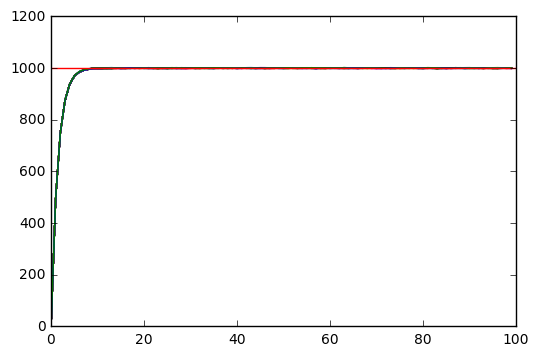

In [174]:
# Equal Brownian motion and selection.
params_selection = {
    "alpha": 0.5,
    "delta": 0.5,
    "theta": 1000.0,
    "dt": 1,
    "total_time": 100
}
generate_ornstein_uhlenbeck_distribution(100, params_selection)

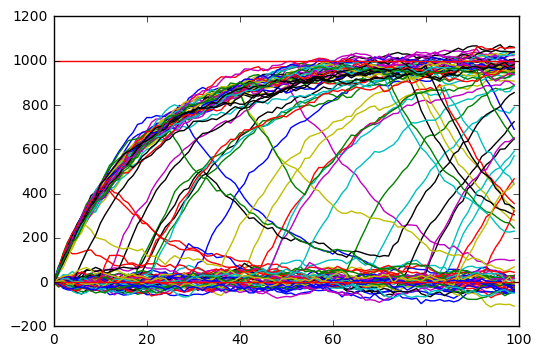

In [210]:
# OU with shifting theta based on a given probability of theta changing.
params_selection = {
    "alpha": 0.05,
    "delta": 10,
    "thetas": [1000.0, 0.0],
    "p_theta": 0.01,
    "dt": 1,
    "total_time": 100
}
generate_shifting_ornstein_uhlenbeck_distribution(100, params_selection)

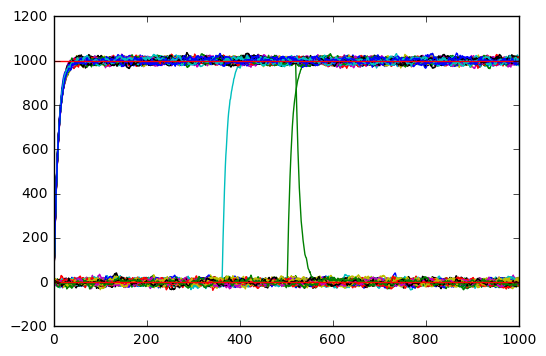

In [203]:
# OU with shifting theta based on a given probability of theta changing.
params_selection = {
    "alpha": 0.1,
    "delta": 4,
    "thetas": [1000.0, 0.0],
    "p_theta": 0.0001,
    "dt": 1,
    "total_time": 1000
}
generate_shifting_ornstein_uhlenbeck_distribution(100, params_selection)

In [13]:

    
x = [[1,2,3],[4,5,6],[7,8,9]]

for array in x: #<-- [1,2,3]
    print(array)
    for y in array:
        print(y)


[1, 2, 3]
1
2
3
[4, 5, 6]
4
5
6
[7, 8, 9]
7
8
9
